In [1]:
try:
    output_filepath
except:
    output_filepath = 's3://workspaces-clarity-mgmt-pro/jaime.oliver/misc/social_capital/data/processed/'

In [2]:
import os
from pathlib import Path

import pandas as pd
import numpy as np

from linearmodels.panel import PanelOLS
import patsy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


In [3]:
data_path = os.path.join(output_filepath, 'panel_data.parquet')
df_model = pd.read_parquet(data_path)
centralities = ['authorities', 'hubs', 'pagerank', 'gfi', 'bridging', 'favor']

df_model.dropna(subset = ['log_GFCF', 'log_gdp'], inplace=True)

df_model.eval('gdp_per_capita = gdp/wkn_population', inplace=True)
df_model.eval('productivity = gdp*10**6/(wkn_population**0.3*GFCF**0.7)', inplace=True)

df_model = df_model[~df_model.country.isin(['ETH', 'BLR', 'ZWE', 'MDA', 'GUY', 'VNM', 'MAC', 'PSE', 'AGO', 'COD', 'TZA'])]
#df_model = df_model[df_model.wkn_population>1.e6]

In [4]:
f = f'log_gdp ~ log_GFCF + log_wkn_population + 1'
y, X = patsy.dmatrices(f, df_model.set_index(['country','year']),  return_type='dataframe')
base_model_fe = PanelOLS(y,X, entity_effects=True, time_effects=True)
base_model_fe = base_model_fe.fit()

df_model['residual'] = base_model_fe.resids.values

/home/ubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log1p
/home/ubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy shoul

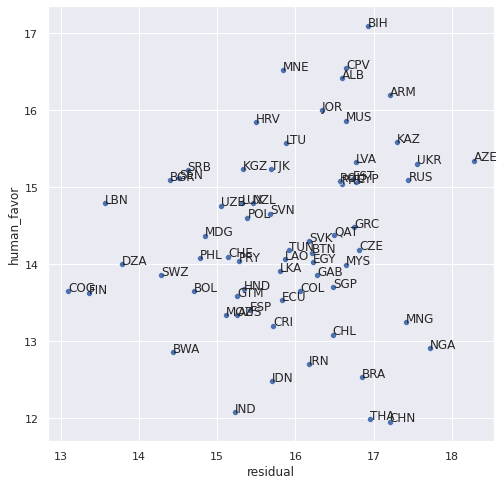

In [6]:
network = 'human'
#network = 'financial'
#network = 'goods'

centrality = 'hubs'
centrality = 'authorities'
#centrality = 'pagerank'
centrality = 'favor'
#centrality = 'bridging'

x_var = 'productivity'
x_var = 'residual'
#x_var = 'gdp_per_capita'

#x_var = f'financial_hubs'
y_var = f'{network}_{centrality}'

df_plot =  df_model[df_model.year.between(1995, 2016)]
df_plot =  df_model[df_model.year == 2015]

for c in [x_var, y_var]:
    df_plot[c] = df_plot[c].map(lambda x: np.log1p(x*1.e8))

fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=df_plot, x=x_var, y=y_var, ax=ax)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

label_point(df_plot[x_var], df_plot[y_var], df_plot['country'], plt.gca())

In [6]:
from linearmodels.panel import PanelOLS, PooledOLS
import patsy

df=df_model.dropna(subset = ['human_favor', 'productivity'])
df['human_favor'] =  df['human_favor'].map(lambda x: np.log1p(x*1.e8))

f = f'productivity ~ human_favor + 1'
#f = f'log_gdp ~ log_GFCF + log_wkn_population + human_favor + 1'
y, X = patsy.dmatrices(f, df.set_index(['country','year']),return_type='dataframe')
base_model_fe = PanelOLS(y,X, entity_effects=True, time_effects=True)
#base_model_fe = PooledOLS(y, X)
base_model_fe = base_model_fe.fit()
base_model_fe

/home/ubuntu/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Dep. Variable:,productivity,R-squared:,0.0243
Estimator:,PanelOLS,R-squared (Between):,-0.2070
No. Observations:,4220,R-squared (Within):,0.0271
Date:,"Fri, Aug 27 2021",R-squared (Overall):,-0.1172
Time:,14:30:28,Log-likelihood,-4.56e+04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,100.72
Entities:,154,P-value,0.0000
Avg Obs:,27.403,Distribution:,"F(1,4036)"
Min Obs:,1.0000,,
Max Obs:,30.000,F-statistic (robust):,100.72
